In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score, precision_score, f1_score, matthews_corrcoef, recall_score 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# 4)

 - Functions

In [18]:
def margin_plot (model):
    plt.figure(figsize=(25, 15))
    # Plotting our two-features-space
    sns.scatterplot(x=X[:, 0], 
                    y=X[:, 1], 
                    hue=y, 
                    s=8);
    # Constructing a hyperplane using a formula.
    w = model.coef_[0]           # w consists of 2 elements
    b = model.intercept_[0]      # b consists of 1 element
    x_points = np.linspace(-1, 10)    # generating x-points from -1 to 1
    y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
    # Plotting a red hyperplane
    plt.plot(x_points, y_points, c='r');
    # Encircle support vectors
    plt.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1], 
                s=50, 
                facecolors='none', 
                edgecolors='k', 
                alpha=.5);
    # Step 2 (unit-vector):
    w_hat = model.coef_[0] / (np.sqrt(np.sum(model.coef_[0] ** 2)))
    # Step 3 (margin):
    margin = 1 / np.sqrt(np.sum(model.coef_[0] ** 2))
    # Step 4 (calculate points of the margin lines):
    decision_boundary_points = np.array(list(zip(x_points, y_points)))
    points_of_line_above = decision_boundary_points + w_hat * margin
    points_of_line_below = decision_boundary_points - w_hat * margin
    # Plot margin lines
    # Blue margin line above
    plt.plot(points_of_line_above[:, 0], 
            points_of_line_above[:, 1], 
            'b--', 
            linewidth=2)
    # Green margin line below
    plt.plot(points_of_line_below[:, 0], 
            points_of_line_below[:, 1], 
            'g--',
            linewidth=2)
    plt.title("With " + str(len(model.support_vectors_)) + " support vectors")

 - Data

In [7]:
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
print(X.shape)
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target
print(y.shape)

(150, 2)
(150,)



## a)


 - If support vectors are removed this means that the decision boundary would be reduced given than less point would be "allowed" inside it, being the extreme case where no slack is allowed and all the support vector lie along the margin. On the other hand by allowing more support vectors, this would generate a wider margir, bigger error, but also improve generalization and  alow to find separation of data that isnt lenearly separable

## b) 

 - We will use linear models in order to vizualy ilustrate the effect


### All Support Vectors

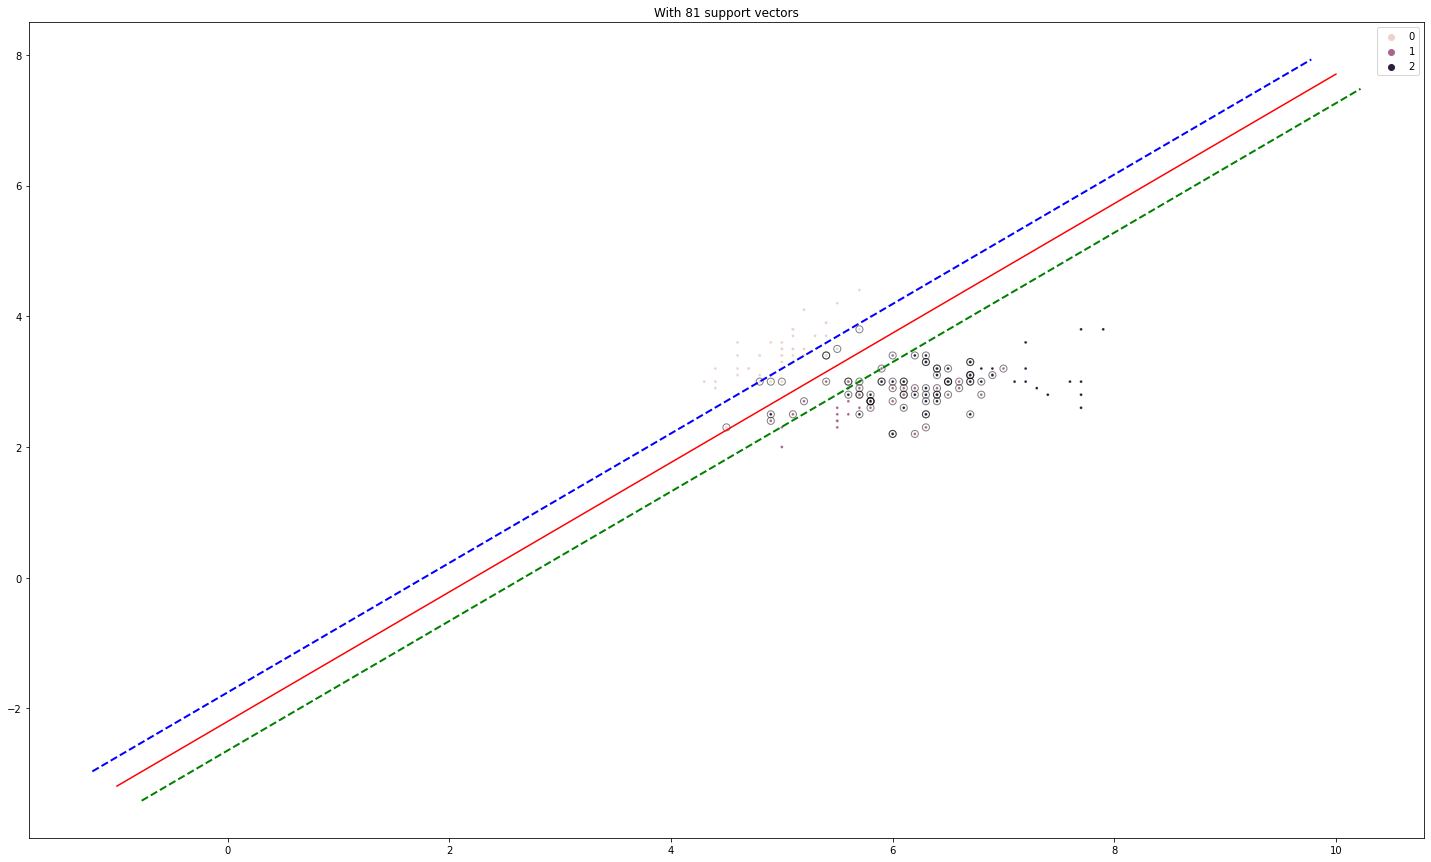

In [19]:
## First lets verify how many support vectors there are on the previous model:
svc = svm.SVC(kernel='linear').fit(X, y)
margin_plot(svc)

 - Margin Size

In [26]:
support_vectors = svc.support_vectors_

# Compute the margin size
distances = svc.decision_function(support_vectors)
margin_size = 2 / np.linalg.norm(svc.coef_) * np.abs(distances).min()

print("The margin size with all support vectors is: ", margin_size)

The margin size with all support vectors is:  0.06817205751895415


### Removed Support Vectors

 - We will remove the 20 first support vectors

In [34]:
support_indices = svc.support_
support_indices[:20]

reduced_X = np.delete(X, support_indices[:20], axis=0)
reduced_y = np.delete(y, support_indices[:20])

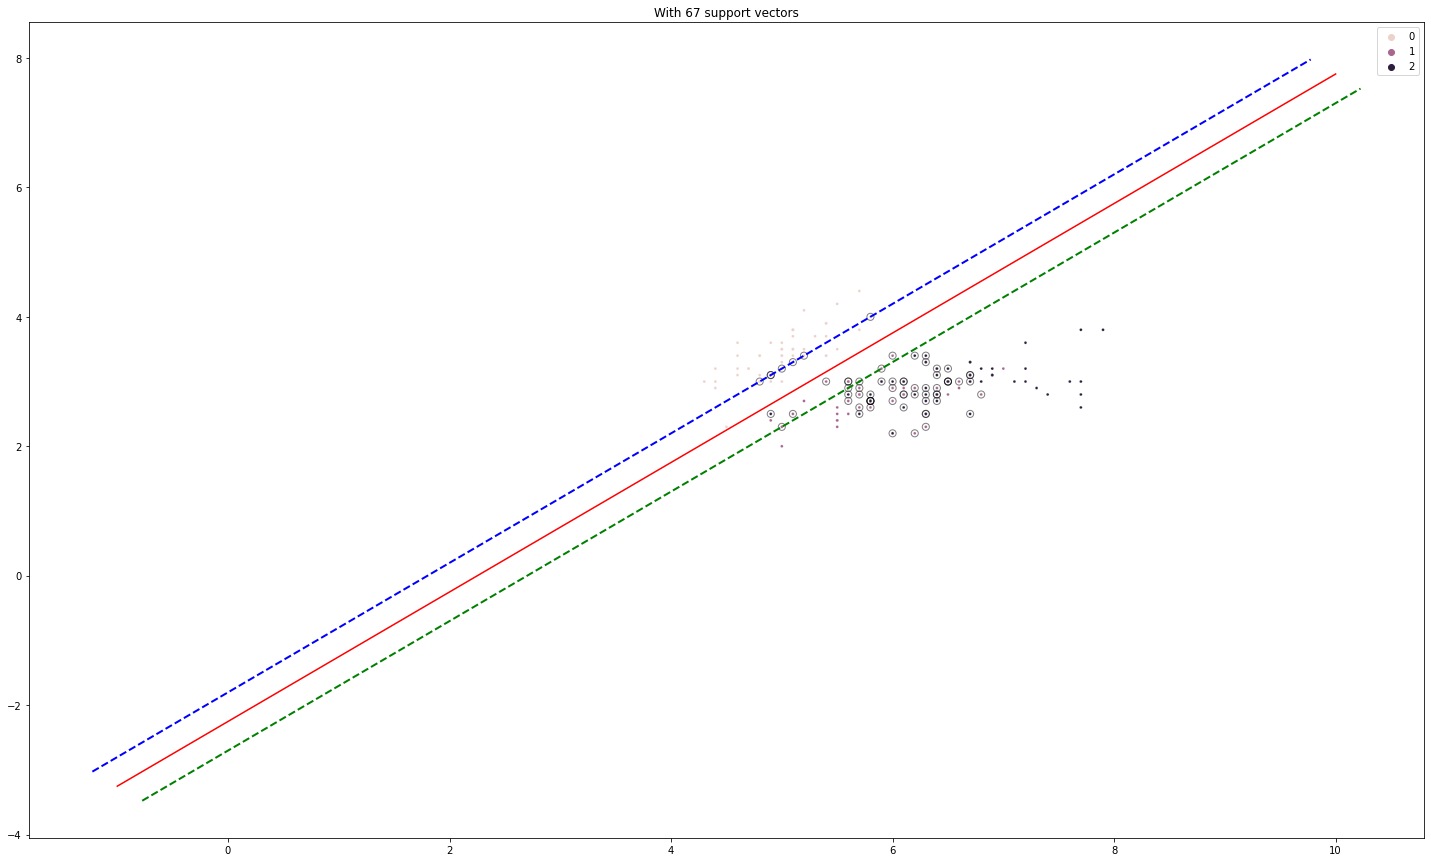

In [35]:
svc_reduced = svm.SVC(kernel='linear').fit(reduced_X, reduced_y)
margin_plot(svc_reduced)

 - Margin Size

In [36]:
support_vectors_reduced = svc_reduced.support_vectors_

# Compute the margin size
distances_reduced = svc_reduced.decision_function(support_vectors_reduced)
margin_size_reduced = 2 / np.linalg.norm(svc_reduced.coef_) * np.abs(distances_reduced).min()

print("The margin size with less 20 support vectors is: ", margin_size_reduced)

The margin size with less 20 support vectors is:  0.043842191792336706


## Final Discussion

In [38]:
print("The size of the  margin size with less 20 support vectors is: " + str(margin_size_reduced) + ", compared with with " + str(margin_size) + ", for all support vectors")

The size of the  margin size with less 20 support vectors is: 0.043842191792336706, compared with with 0.06817205751895415, for all support vectors


 - As we expected the margin size reduced when support vectors were removed and also that when  less values fall inside the margin meaning less error but possibli a reduced capability to generelize 

As we can see the margin was reduced and is possible to see that less values fall inside the margin.

# 5

In [58]:
def report (y_test, preds):
    stats = pd.DataFrame()  
    #aqui como o target é multiclass (nao é binary) 
    #ele queixava-se do campo "average" estar binary
    #deixei no "micro" que o que faz é: "Calculate metrics globally 
    #by counting the total true positives, false negatives and false positives."
    stats['Precision'] = [precision_score(y_test, preds, average='micro')] 
    stats['Recall'] = [recall_score(y_test, preds, average='micro')]
    stats['F1'] = [f1_score(y_test, preds, average='micro')]
    stats['Matthews'] = [matthews_corrcoef(y_test, preds)]
    display(stats)

 - Data

In [43]:
iris = datasets.load_iris()
X = iris.data[:, :2] 
y = iris.target

#train-test split + IVS
X_TRAIN, X_IVS, y_TRAIN, y_IVS = train_test_split(X, y, test_size = 0.2, random_state = 123)
X_train, X_test, y_train, y_test = train_test_split(X_TRAIN, y_TRAIN, test_size=0.2, random_state=22)

 - Grid Search

In [64]:
#Using grid search
c_p = [1000, 100, 10, 1, 0.5, 1e-1, 0.05, 1e-2, 1e-3, 1e-5]
gamma_p = [1000, 100, 10, "scale", "auto", 1, 0.5, 1e-1, 0.05, 1e-2, 1e-3, 1e-5]
param_grid = {"C": c_p, "gamma": gamma_p}

#since in the question it is not specified if more hyperparameters are to be optimized
#the remaining ones (all except for C and gamma will be left as their default value
#including the kernel as rbf)

svc = svm.SVC()

#default cv parameter value is 5
gs_svc = GridSearchCV(estimator = svc, param_grid = param_grid, scoring="accuracy").fit(X_train, y_train)

print("Best parameters for SVC:", gs_svc.best_params_)

Best parameters for SVC: {'C': 1000, 'gamma': 0.001}


 - The default kernel (rbf) will be maintained

## Otimized Model

In [71]:
# Retrieving the best estimator model prediction statistics
preds = gs_svc.best_estimator_.predict(X_test)

# cálculo de alguns scores
print(report(y_test, preds))

,Precision,Recall,F1,Matthews
0,0.708333,0.708333,0.708333,0.576166


None


 - IVS

In [73]:
#Training and testing model with optimal combination of hyperparameters with IVS
best_svc = svm.SVC(C=1000, gamma=0.001)
best_svc.fit(X_TRAIN, y_TRAIN)
ivs_preds = best_svc.predict(X_IVS)
print(report(y_IVS, ivs_preds))

,Precision,Recall,F1,Matthews
0,0.866667,0.866667,0.866667,0.820089


None


## Default Model

- Default values: C = 1.0 gama = 1 / (n_features * X.var())

 - IVS

In [74]:
#Comparing these metrics with the ones produced by model with default hyperparameter values
default_svc =svm.SVC()
default_svc.fit(X_TRAIN, y_TRAIN)
ivs_default_preds = default_svc.predict(X_IVS)
print(report(y_IVS, ivs_default_preds))

,Precision,Recall,F1,Matthews
0,0.833333,0.833333,0.833333,0.78223


None


## Discussion

# 6

 - Data division into X and y 

In [ ]:
points = pd.read_csv("points.csv", on_bad_lines="skip", delimiter=",")

X = points.iloc[:,:2]

points['color'].replace({'Blue': 1, 'Red': 0}, inplace = True)
label = points.iloc[:,2:]

 - Data Viz

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
for i in range(len(points.index)):
  if points["color"][i]==0:
    plt.scatter(points.iloc[i]["x"], points.iloc[i]["y"], marker = "o", c = "r")
  else:
    plt.scatter(points.iloc[i]["x"], points.iloc[i]["y"], marker = "o", c = "b")
plt.title("Scatter for x and y" )
plt.show

## New feature

Lets try to find the aditional feature (z) to have a hyper-plane that separates the classes\
This will be a function(x,y) = z in such a way that z is able to linearly separate both classes

 - Given than Logarithms tend to help handle "non-linear" data we decided to try applying it to the y variable

x = points["x"]
y = points["y"]
z =  x - np.log(y)
points["z"] = z

### 2D Viz x and z

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
for i in range(len(points.index)):
  if points["color"][i]==0:
    plt.scatter(points.iloc[i]["x"], points.iloc[i]["z"], marker = "o", c = "r")
  else:
    plt.scatter(points.iloc[i]["x"], points.iloc[i]["z"], marker = "o", c = "b")

plt.show

### 3D Viz

In [ ]:
fig = px.scatter_3d( x=x, y=y,z=z,color = points['color'])
fig.show()

 - The data seems to be linearly seprable

### The Hyperplane

 - In order to draw a hyperplane we will fit a linear svm to the new transformed data.
    - A new X will be created and the target variable will be tranformed into 0(blue) or 1(red).

In [ ]:
new_x = points[["x", "z"]]

 - Lets fit the model

In [ ]:
svc = svm.SVC(kernel='linear').fit(new_x, label) # with default parameters 

 - Hyperplane Viz

In [ ]:
# Grid
new_x = np.array(new_x)
x_min, x_max = new_x[:, 0].min() - 1, new_x[:, 0].max() + 1
y_min, y_max = new_x[:, 1].min() - 1, new_x[:, 1].max() + 1
h = -(x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

In [ ]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

plt.scatter(points["x"], points["z"], c=points["color"], cmap=plt.cm.Paired)
plt.xlabel('X')
plt.ylabel('Z')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with Linear kernel')
plt.show()

 - Even if 5 blues are miss classified the new feature enabled a linear separation

## Comparison with scikit-learn classifiers

In [ ]:
points = pd.read_csv("points.csv", on_bad_lines="skip", delimiter=",")
points['color'].replace({'Blue': 1, 'Red': 0}, inplace = True)

X = points.iloc[:,:2]
label = points.iloc[:,2:]

In [ ]:
# Grid
X = np.array(X)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = -(x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

### linear - default parameters

In [ ]:
svc = svm.SVC(kernel='linear').fit(X, label)

plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

plt.scatter(points["x"], points["y"], c=points["color"], cmap=plt.cm.Paired)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with Linear kernel')
plt.show()

 - "Coment"

### sigmoid - default parameters

In [ ]:
svc = svm.SVC(kernel='sigmoid').fit(X, label)

plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

plt.scatter(points["x"], points["y"], c=points["color"], cmap=plt.cm.Paired)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with sigmoid kernel')
plt.show()

 - "Coment"

### polynomial - default parameters

In [ ]:
svc = svm.SVC(kernel='poly').fit(X, label)

plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

plt.scatter(points["x"], points["y"], c=points["color"], cmap=plt.cm.Paired)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with Polynomial kernel')
plt.show()

 - "Coment"

### rbf - default parameters

In [ ]:
svc = svm.SVC(kernel='rbf').fit(X, label)

plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

plt.scatter(points["x"], points["y"], c=points["color"], cmap=plt.cm.Paired)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with Radial Basis kernel')
plt.show()

 - "Coment"

## Final Discussion